In [1]:
!which python

/Users/sam/opt/anaconda3/envs/oy-env/bin/python


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from src.data import data_collection

In [5]:
# data_collection.download_data_and_load_into_sql()

In [6]:
import psycopg2
import pandas as pd
import numpy as np

In [7]:
DBNAME = "opportunity_youth"

In [8]:
conn = psycopg2.connect(dbname=DBNAME)

In [258]:
oy_by_education = pd.read_csv('oy_by_education.csv')
oy_by_education.columns = ['unnamed: 0', 
                        'group', 
                        '16_18_%', 
                        '16_18_values', 
                        '19_21_%', 
                        '19_21_values', 
                        '22_24_%', 
                        '22_24_values', 
                        'totals_%', 
                        'totals_values']
oy_by_education

,unnamed: 0,group,16_18_%,16_18_values,19_21_%,19_21_values,22_24_%,22_24_values,totals_%,totals_values
0,0,Opportunity Youth,100,1815.0,100,4083.0,100,5217.0,100,11115.0
1,1,No Diploma,50,916.0,28,1135.0,27,1391.0,31,3442.0
2,2,HS or GED,43,781.0,53,2183.0,45,2325.0,48,5289.0
3,3,"Some College, No Degree",7,118.0,16,649.0,21,1074.0,17,1841.0
4,4,College Degree (associates+),0,0.0,3,116.0,8,427.0,5,543.0


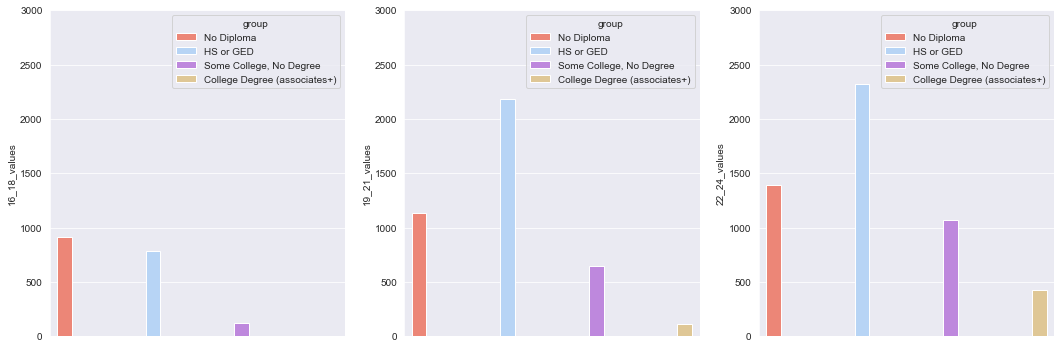

In [278]:
fig, ax = plt.subplots(1,3,figsize=(18,6))

education_palette = {'No Diploma': '#FF7764', 'HS or GED': '#ADD3FF', 'Some College, No Degree': '#C27AEB', 'College Degree (associates+)': '#EBCB8A'}

sns.barplot(data=oy_by_education[1:], x='group', y='16_18_values', hue='group', ax=ax[0], palette=education_palette)
sns.barplot(data=oy_by_education[1:], x='group', y='19_21_values', hue='group', ax=ax[1], palette=education_palette)
sns.barplot(data=oy_by_education[1:], x='group', y='22_24_values', hue='group', ax=ax[2], palette=education_palette)
ax[0].set_ylim(0, 3000)
ax[1].set_ylim(0, 3000)
ax[2].set_ylim(0, 3000)
ax[0].get_xaxis().set_visible(False)
ax[1].get_xaxis().set_visible(False)
ax[2].get_xaxis().set_visible(False)
pass

### income by district

In [226]:
oy_df = pd.read_csv('oy_df.csv')
ay_df = pd.read_csv('ay_df.csv')
oy_11610 = oy_df.loc[oy_df['puma'].isin(['11610'])]
oy_11611 = oy_df.loc[oy_df['puma'].isin(['11611'])]
oy_11612 = oy_df.loc[oy_df['puma'].isin(['11612'])]
oy_11613 = oy_df.loc[oy_df['puma'].isin(['11613'])]
oy_11614 = oy_df.loc[oy_df['puma'].isin(['11614'])]
oy_11615 = oy_df.loc[oy_df['puma'].isin(['11615'])]
ay_11610 = ay_df.loc[ay_df['puma'].isin(['11610'])]
ay_11611 = ay_df.loc[ay_df['puma'].isin(['11611'])]
ay_11612 = ay_df.loc[ay_df['puma'].isin(['11612'])]
ay_11613 = ay_df.loc[ay_df['puma'].isin(['11613'])]
ay_11614 = ay_df.loc[ay_df['puma'].isin(['11614'])]
ay_11615 = ay_df.loc[ay_df['puma'].isin(['11615'])]

In [242]:
oy_rate_11610 = oy_11610['pwgtp'].sum()/ay_11610['pwgtp'].sum()
oy_rate_11611 = oy_11611['pwgtp'].sum()/ay_11611['pwgtp'].sum()
oy_rate_11612 = oy_11612['pwgtp'].sum()/ay_11612['pwgtp'].sum()
oy_rate_11613 = oy_11613['pwgtp'].sum()/ay_11613['pwgtp'].sum()
oy_rate_11614 = oy_11614['pwgtp'].sum()/ay_11614['pwgtp'].sum()
oy_rate_11615 = oy_11615['pwgtp'].sum()/ay_11615['pwgtp'].sum()
oy_rate_by_puma_list = [oy_rate_11610, oy_rate_11611, oy_rate_11612, oy_rate_11613, oy_rate_11614, oy_rate_11615]

In [254]:
pincp_sums_df = pd.read_sql("""
                    SELECT pn.puma_name, puma, count(puma), sum(pincp) as sum_of_pincp_w_in_puma
                    FROM pums_2017 AS p 
                    INNER JOIN puma_names_2010 AS pn
                    USING(puma)
                    WHERE puma IN ('11610', '11611', '11612', '11613', '11614', '11615')
                    AND agep >= 16
                    GROUP BY puma, puma_name
                """, conn)
pincp_sums_df

,puma_name,puma,count,sum_of_pincp_w_in_puma
0,"King County (Central)--Renton City, Fairwood, ...",11610,4596,199771510.0
1,"King County (West Central)--Burien, SeaTac, Tu...",11611,4927,185678089.0
2,"King County (Far Southwest)--Federal Way, Des ...",11612,4163,166461501.0
3,King County (Southwest Central)--Kent City ...,11613,4333,159556865.0
4,King County (Southwest)--Auburn City & Lakelan...,11614,4705,172075242.0
5,"King County (Southeast)--Maple Valley, Covingt...",11615,4805,241660566.0


In [252]:
pincp_sums_df['avg_pincp_for_puma'] = round(pincp_sums_df['sum_of_pincp_w_in_puma']/pincp_sums_df['count'], 2)
pincp_sums_df['OY_prevelance_in_puma'] = oy_rate_by_puma_list


pincp_sums_df.sort_values('avg_pincp_for_puma')

,puma_name,puma,count,sum_of_pincp_w_in_puma,avg_pincp_for_puma,OY_prevelance_in_puma
4,King County (Southwest)--Auburn City & Lakelan...,11614,4705,172075242.0,36572.85,0.113928
3,King County (Southwest Central)--Kent City ...,11613,4333,159556865.0,36823.65,0.129895
1,"King County (West Central)--Burien, SeaTac, Tu...",11611,4927,185678089.0,37685.83,0.151537
2,"King County (Far Southwest)--Federal Way, Des ...",11612,4163,166461501.0,39985.95,0.139399
0,"King County (Central)--Renton City, Fairwood, ...",11610,4596,199771510.0,43466.39,0.133162
5,"King County (Southeast)--Maple Valley, Covingt...",11615,4805,241660566.0,50293.56,0.104399


### opportunity youth work/diploma status by age

In [97]:
pd.read_csv('oy_by_age.csv').columns

Index(['Unnamed: 0', ' ', '16-18 (%)', '16-18 Values', '19-21 (%)',
       '19-21 Values', '22-24 (%)', '22-24 Values', 'Totals (%)',
       'Totals Values'],
      dtype='object')

In [101]:
oy_by_age_df = pd.read_csv('oy_by_age.csv')
oy_by_age_df.columns = ['unnamed: 0', 
                        'group', 
                        '16_18_%', 
                        '16_18_values', 
                        '19_21_%', 
                        '19_21_values', 
                        '22_24_%', 
                        '22_24_values', 
                        'totals_%', 
                        'totals_values']
oy_by_age_df

,unnamed: 0,group,16_18_%,16_18_values,19_21_%,19_21_values,22_24_%,22_24_values,totals_%,totals_values
0,0,Total Population,100,30141.0,100,25486.0,100,30256.0,100,85883.0
1,1,Opportunity Youth,6,1815.0,16,4083.0,17,5217.0,13,11115.0
2,2,Working Without Diploma,1,449.0,5,1377.0,5,1589.0,4,3415.0
3,3,Not an Opportunity Youth,92,27877.0,79,20026.0,78,23450.0,83,71353.0


In [109]:
oy_by_age_df['16_18_%'].dtype

dtype('int64')

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

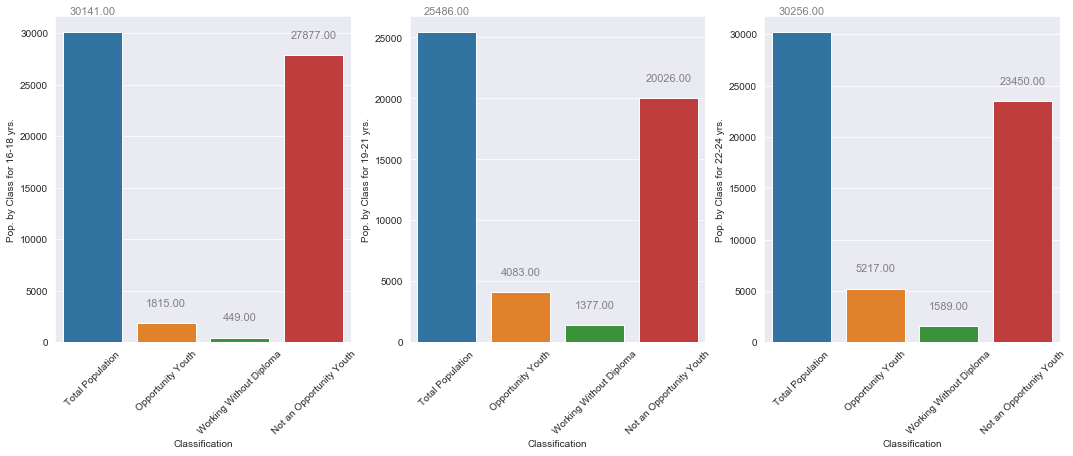

In [157]:
# create subplot figure
fig, axs = plt.subplots(1,3,figsize=(18,6))

# plot 16-18 yr olds
sns.barplot(data = oy_by_age_df, x = 'group', y='16_18_values', ax = axs[0])
axs[0].set(ylabel='Pop. by Class for 16-18 yrs.', xlabel='Classification')
axs[0].set_xticklabels(oy_by_age_df['group'], rotation = 45)

# plot 19-21 yr olds
sns.barplot(data = oy_by_age_df, x = 'group', y='19_21_values', ax = axs[1])
axs[1].set(ylabel='Pop. by Class for 19-21 yrs.', xlabel='Classification')
axs[1].set_xticklabels(oy_by_age_df['group'], rotation = 45)

# plot 22-24 yr olds
sns.barplot(data = oy_by_age_df, x = 'group', y='22_24_values', ax = axs[2])
axs[2].set(ylabel='Pop. by Class for 22-24 yrs.', xlabel='Classification')
axs[2].set_xticklabels(oy_by_age_df['group'], rotation = 45)

# add pop. values to tops of bars
for p in axs[0].patches:
    axs[0].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
        textcoords='offset points')
for p in axs[1].patches:
    axs[1].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
        textcoords='offset points')
for p in axs[2].patches:
    axs[2].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
        textcoords='offset points')

## total youth in SKC

In [92]:
youth_df = pd.read_sql("""
            SELECT * FROM pums_2017 
            WHERE puma in ('11610', '11611', '11612', '11613', '11614', '11615')
            AND agep BETWEEN 16 AND 24
            """, conn)
youth_df['pwgtp'].sum()

85883.0

## OY employment breakdown

In [11]:
# len(pd.read_sql("""select * from pums_2017""", conn))

In [12]:
pd.read_sql("""
            SELECT cow, COUNT(cow)
            FROM pums_2017
            WHERE agep BETWEEN 16 AND 24
            AND puma in ('11610','11611', '11612', '11613', '11614', '11615')
            GROUP BY cow
            ;
            """, conn)

,cow,count
0,1,1966
1,2,142
2,3,82
3,4,55
4,5,24
5,6,62
6,7,12
7,8,7
8,9,86
9,None,0


## OY DataFrame

In [13]:
oy_df = pd.read_sql("""
            SELECT *
            FROM pums_2017
            WHERE esr!='1' AND esr!='4'
            AND sch='1'
            AND agep BETWEEN 16 AND 24
            AND puma IN ('11610','11611', '11612', '11613', '11614', '11615')
            ;
            """, conn)


## OY without diploma

In [14]:
oy_df.loc[oy_df['schl'].isin(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15' ])]


,rt,serialno,division,sporder,puma,region,st,adjinc,pwgtp,agep,...,pwgtp71,pwgtp72,pwgtp73,pwgtp74,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80
3,P,2013000058010,9,02,11614,4,53,1061971,45.0,17.0,...,20.0,56.0,51.0,39.0,40.0,52.0,17.0,48.0,51.0,54.0
6,P,2013000118713,9,03,11613,4,53,1061971,25.0,23.0,...,26.0,25.0,29.0,6.0,24.0,26.0,25.0,41.0,24.0,43.0
9,P,2013000100470,9,04,11613,4,53,1061971,16.0,18.0,...,23.0,3.0,16.0,17.0,11.0,12.0,32.0,29.0,20.0,11.0
11,P,2013000121584,9,02,11611,4,53,1061971,19.0,18.0,...,17.0,21.0,32.0,17.0,5.0,12.0,7.0,4.0,30.0,21.0
13,P,2013000155051,9,03,11614,4,53,1061971,2.0,19.0,...,1.0,3.0,3.0,1.0,2.0,2.0,1.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,P,2017001208143,9,03,11612,4,53,1011189,16.0,17.0,...,5.0,5.0,17.0,16.0,28.0,25.0,5.0,16.0,13.0,4.0
401,P,2017001295574,9,03,11611,4,53,1011189,18.0,17.0,...,5.0,34.0,15.0,32.0,16.0,6.0,16.0,6.0,29.0,5.0
403,P,2017001386502,9,01,11613,4,53,1011189,17.0,18.0,...,2.0,18.0,32.0,3.0,3.0,18.0,18.0,29.0,16.0,17.0
408,P,2017001470135,9,01,11613,4,53,1011189,17.0,23.0,...,32.0,3.0,2.0,17.0,17.0,32.0,18.0,16.0,16.0,17.0


## OY with diploma or GED

In [15]:
oy_df.loc[oy_df['schl'].isin(['16', '17'])]


,rt,serialno,division,sporder,puma,region,st,adjinc,pwgtp,agep,...,pwgtp71,pwgtp72,pwgtp73,pwgtp74,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80
0,P,2013000047506,9,04,11615,4,53,1061971,5.0,20.0,...,1.0,6.0,6.0,7.0,5.0,2.0,4.0,1.0,6.0,1.0
2,P,2013000057563,9,05,11611,4,53,1061971,20.0,21.0,...,6.0,7.0,24.0,23.0,6.0,33.0,19.0,33.0,33.0,18.0
4,P,2013000059060,9,02,11610,4,53,1061971,19.0,22.0,...,7.0,20.0,16.0,5.0,21.0,5.0,20.0,15.0,17.0,5.0
7,P,2013000070516,9,03,11612,4,53,1061971,20.0,19.0,...,37.0,20.0,15.0,32.0,6.0,14.0,5.0,6.0,16.0,18.0
10,P,2013000111689,9,05,11610,4,53,1061971,40.0,19.0,...,61.0,12.0,51.0,12.0,13.0,41.0,37.0,52.0,32.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,P,2017001244336,9,07,11613,4,53,1011189,42.0,21.0,...,11.0,39.0,47.0,13.0,62.0,42.0,74.0,64.0,39.0,36.0
402,P,2017001325124,9,03,11615,4,53,1011189,36.0,24.0,...,33.0,35.0,12.0,36.0,31.0,38.0,11.0,61.0,60.0,33.0
405,P,2017001373291,9,02,11610,4,53,1011189,14.0,22.0,...,15.0,21.0,32.0,14.0,16.0,12.0,4.0,19.0,17.0,4.0
406,P,2017001464049,9,01,11613,4,53,1011189,18.0,21.0,...,34.0,2.0,2.0,19.0,17.0,32.0,18.0,18.0,19.0,20.0


## OY some college no degree

In [16]:
oy_df.loc[oy_df['schl'].isin(['18', '19'])]


,rt,serialno,division,sporder,puma,region,st,adjinc,pwgtp,agep,...,pwgtp71,pwgtp72,pwgtp73,pwgtp74,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80
1,P,2013000048962,9,05,11612,4,53,1061971,25.0,22.0,...,7.0,37.0,24.0,44.0,26.0,7.0,25.0,9.0,39.0,7.0
5,P,2013000067168,9,03,11615,4,53,1061971,22.0,24.0,...,7.0,20.0,24.0,23.0,41.0,7.0,24.0,24.0,33.0,19.0
8,P,2013000106284,9,01,11614,4,53,1061971,4.0,23.0,...,4.0,5.0,4.0,6.0,8.0,5.0,5.0,1.0,1.0,3.0
16,P,2013000128172,9,01,11612,4,53,1061971,118.0,23.0,...,117.0,171.0,181.0,52.0,106.0,143.0,111.0,32.0,94.0,168.0
18,P,2013000215337,9,03,11613,4,53,1061971,17.0,20.0,...,30.0,17.0,20.0,5.0,16.0,5.0,5.0,27.0,26.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,P,2017000767627,9,03,11612,4,53,1011189,45.0,19.0,...,75.0,48.0,41.0,61.0,49.0,33.0,59.0,87.0,10.0,61.0
384,P,2017000908520,9,03,11615,4,53,1011189,16.0,22.0,...,12.0,21.0,15.0,16.0,4.0,4.0,23.0,35.0,5.0,23.0
390,P,2017000971543,9,02,11611,4,53,1011189,27.0,21.0,...,36.0,25.0,44.0,37.0,7.0,22.0,10.0,29.0,33.0,30.0
396,P,2017001219485,9,04,11615,4,53,1011189,23.0,20.0,...,37.0,7.0,8.0,46.0,17.0,20.0,49.0,21.0,36.0,33.0


## OY with degree

In [17]:
oy_df.loc[oy_df['schl'].isin(['20', '21', '22', '23', '24'])]

,rt,serialno,division,sporder,puma,region,st,adjinc,pwgtp,agep,...,pwgtp71,pwgtp72,pwgtp73,pwgtp74,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80
20,P,2013000220663,9,03,11615,4,53,1061971,14.0,22.0,...,4.0,12.0,24.0,4.0,22.0,13.0,12.0,16.0,14.0,13.0
21,P,2013000242451,9,02,11611,4,53,1061971,52.0,23.0,...,56.0,97.0,60.0,18.0,52.0,58.0,15.0,50.0,93.0,83.0
39,P,2013000558644,9,01,11610,4,53,1061971,47.0,23.0,...,15.0,44.0,13.0,42.0,69.0,47.0,78.0,16.0,48.0,81.0
50,P,2013000697580,9,02,11610,4,53,1061971,13.0,24.0,...,4.0,13.0,21.0,3.0,23.0,14.0,14.0,13.0,13.0,18.0
85,P,2013001303697,9,03,11615,4,53,1061971,23.0,19.0,...,26.0,29.0,15.0,24.0,28.0,23.0,7.0,28.0,71.0,34.0
120,P,2014000329012,9,02,11615,4,53,1045195,24.0,22.0,...,8.0,23.0,32.0,39.0,8.0,26.0,23.0,6.0,23.0,44.0
137,P,2014000669756,9,03,11615,4,53,1045195,46.0,20.0,...,82.0,43.0,18.0,44.0,85.0,46.0,46.0,77.0,43.0,15.0
152,P,2014000964654,9,03,11610,4,53,1045195,12.0,24.0,...,10.0,25.0,4.0,4.0,12.0,13.0,23.0,14.0,14.0,15.0
184,P,2014001470313,9,01,11613,4,53,1045195,15.0,23.0,...,26.0,6.0,5.0,32.0,15.0,14.0,22.0,15.0,27.0,23.0
192,P,2015000095262,9,03,11613,4,53,1035988,23.0,21.0,...,25.0,24.0,8.0,41.0,6.0,7.0,21.0,20.0,39.0,19.0


## OY breakdown by race

In [18]:
pd.read_sql("""
            SELECT rac1p, count(rac1p) FROM pums_2017 
            WHERE puma in ('11610', '11611', '11612', '11613', '11614', '11615')
            AND agep BETWEEN 16 AND 24
            AND sch='1'
            AND esr!='1' AND esr!='4'
            GROUP BY rac1p
            """, conn)

,rac1p,count
0,1,220
1,2,37
2,3,19
3,4,3
4,5,5
5,6,43
6,7,11
7,8,30
8,9,42


In [19]:
print('number of oportunity youth (with weight applied): ' + str(oy_df['pwgtp'].sum()))

number of oportunity youth (with weight applied): 11115.0


In [20]:
oy_df.groupby('agep').sum()['pwgtp']

agep
16.0     318.0
17.0     293.0
18.0    1204.0
19.0    1493.0
20.0    1098.0
21.0    1492.0
22.0    1717.0
23.0    1912.0
24.0    1588.0
Name: pwgtp, dtype: float64

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

## visualization of OY by age in SKC

In [22]:
oy_df.head()

,rt,serialno,division,sporder,puma,region,st,adjinc,pwgtp,agep,...,pwgtp71,pwgtp72,pwgtp73,pwgtp74,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80
0,P,2013000047506,9,04,11615,4,53,1061971,5.0,20.0,...,1.0,6.0,6.0,7.0,5.0,2.0,4.0,1.0,6.0,1.0
1,P,2013000048962,9,05,11612,4,53,1061971,25.0,22.0,...,7.0,37.0,24.0,44.0,26.0,7.0,25.0,9.0,39.0,7.0
2,P,2013000057563,9,05,11611,4,53,1061971,20.0,21.0,...,6.0,7.0,24.0,23.0,6.0,33.0,19.0,33.0,33.0,18.0
3,P,2013000058010,9,02,11614,4,53,1061971,45.0,17.0,...,20.0,56.0,51.0,39.0,40.0,52.0,17.0,48.0,51.0,54.0
4,P,2013000059060,9,02,11610,4,53,1061971,19.0,22.0,...,7.0,20.0,16.0,5.0,21.0,5.0,20.0,15.0,17.0,5.0


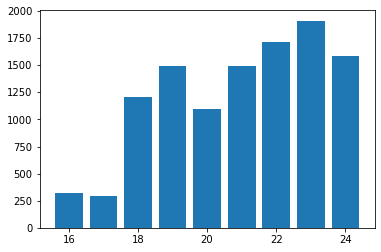

In [23]:
fig, ax = plt.subplots()
oy_by_age_values = list(oy_df.groupby('agep').sum()['pwgtp'])
ax.bar(list(oy_df.groupby('agep').sum()['pwgtp'].keys()), oy_by_age_values)
plt.show()

### breakdown of OY per age group (16-18, 19-21, 22-24)

In [24]:
counter = 0
current_val = 0
oy_by_age_group = []
for value in oy_by_age_values:
    counter += 1
    current_val += value
    if counter == 3:
        counter = 0
        oy_by_age_group.append(current_val)
        current_val = 0
oy_age_group_df = pd.DataFrame(oy_by_age_group)
oy_age_group_df.index = ['16-18', '19-21', '22-24']
oy_age_group_df.columns = ['unwieghted_number_of_oy_per_age_group']
oy_age_group_df

,unwieghted_number_of_oy_per_age_group
16-18,1815.0
19-21,4083.0
22-24,5217.0


## visualization of youth (not oy specific) by age in SKC

In [25]:
youth_df.groupby('agep').sum()['pwgtp']

agep
16.0    10407.0
17.0    10321.0
18.0     9413.0
19.0     8089.0
20.0     9121.0
21.0     8276.0
22.0     9551.0
23.0    10219.0
24.0    10486.0
Name: pwgtp, dtype: float64

In [26]:
list(youth_df.groupby('agep').sum()['pwgtp'])

[10407.0, 10321.0, 9413.0, 8089.0, 9121.0, 8276.0, 9551.0, 10219.0, 10486.0]

In [27]:
list(youth_df.groupby('agep').sum()['pwgtp'].keys())

[16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0]

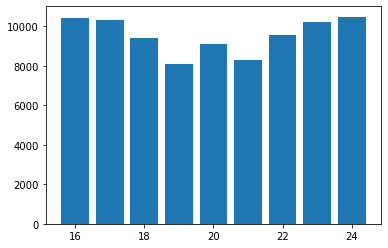

In [28]:
fig, ax = plt.subplots()
youth_by_age_values = list(youth_df.groupby('agep').sum()['pwgtp'])
ax.bar(list(youth_df.groupby('agep').sum()['pwgtp'].keys()), youth_by_age_values)
plt.show()

### breakdown of ALL YOUTH per age group (16-18, 19-21, 22-24)

In [29]:
counter = 0
current_val = 0
total_youth_by_age_group = []
for value in youth_by_age_values:
    counter += 1
    current_val += value
    if counter == 3:
        counter = 0
        total_youth_by_age_group.append(current_val)
        current_val = 0
total_youth_by_age_group

[30141.0, 25486.0, 30256.0]

## percentage of OY out of youth per age group (16-18, 19-21, 22-24)

<BarContainer object of 3 artists>

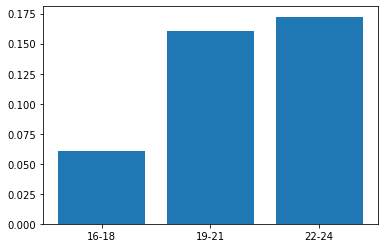

In [30]:
oy_percentage_of_age_pop = [int(o) / int(y) for o,y in zip(oy_by_age_group, total_youth_by_age_group)]
oy_percentage_of_age_pop

plt.bar(['16-18', '19-21', '22-24'], oy_percentage_of_age_pop)

In [31]:
import matplotlib.patches as mpatches

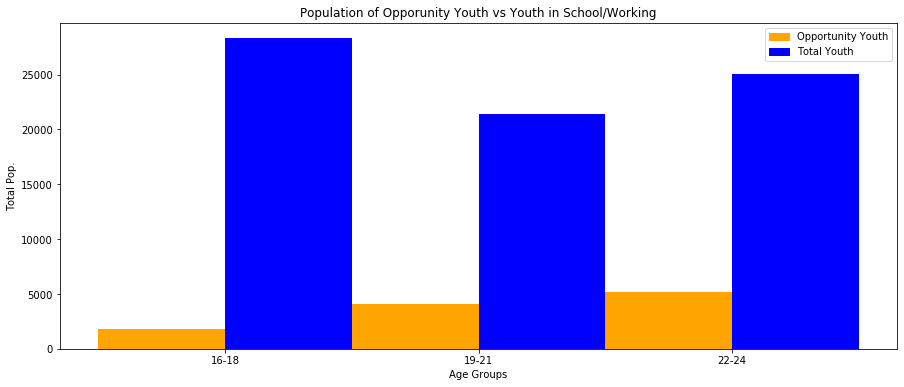

In [32]:
# age_list = list(range(len(age_groups)))
age_list =[1,2,3]
fig, ax = plt.subplots(figsize=(15,6))
x = [1,2,3]
x_minus = [0.75, 1.75, 2.75]
x_plus = [1.25, 2.25, 3.25]
age_groups = ['16-18', '19-21', '22-24']
plt.bar(x_minus, oy_by_age_group, width=0.5, color='orange')
plt.bar(x_plus, np.subtract(total_youth_by_age_group,oy_by_age_group), width=0.5, color='b')
# plt.legend((line1, line2, line3), ('label1', 'label2', 'label3'))
ax.set_xticks(x)
ax.set_xticklabels(age_groups)
ax.set_xlabel('Age Groups')
ax.set_ylabel('Total Pop.')
ax.set_title('Population of Opporunity Youth vs Youth in School/Working')
orange_patch = mpatches.Patch(color='orange', label='Opportunity Youth')
blue_patch = mpatches.Patch(color='blue', label='Total Youth')
plt.legend(handles=[orange_patch, blue_patch])
plt.show()

In [33]:
oy_df_by_age_group = pd.DataFrame(oy_by_age_group, age_groups).reset_index()
oy_df_by_age_group.columns = ['age_groups', 'count']
# print(oy_df_by_age_group)

total_youth_by_age_group_df = pd.DataFrame(np.subtract(total_youth_by_age_group,oy_by_age_group), age_groups).reset_index()
total_youth_by_age_group_df.columns = ['age_groups', 'count']
total_youth_by_age_group_df
# oy_df_by_age_group.to_csv('./age_data.csv')
# pd.read_csv('age_data.csv')

,age_groups,count
0,16-18,28326.0
1,19-21,21403.0
2,22-24,25039.0


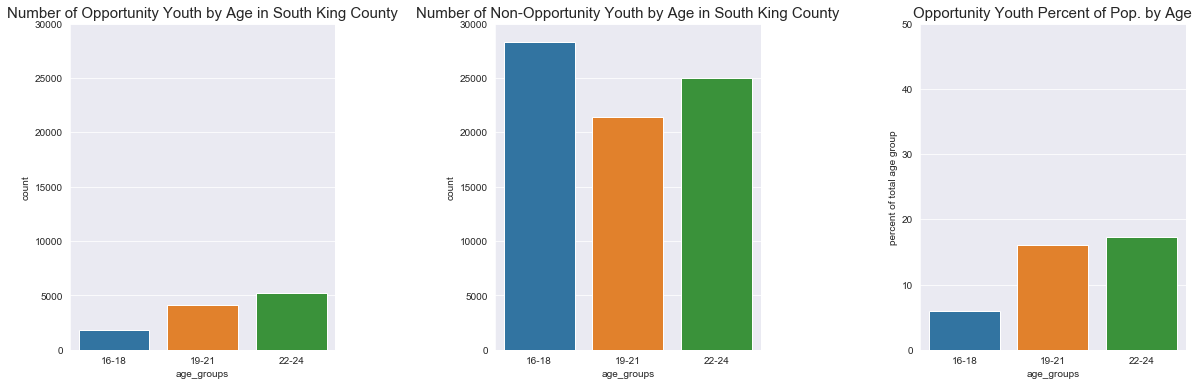

In [34]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1, 3, figsize=(20,6))
axes[0].set_ylim(0,30000)
axes[1].set_ylim(0,30000)
axes[2].set_ylim(0,50)
sns.barplot(data = oy_df_by_age_group, 
            y = oy_df_by_age_group['count'], 
            x = oy_df_by_age_group['age_groups'], 
            ax = axes[0]).set_title('Number of Opportunity Youth by Age in South King County', fontsize=15)
sns.barplot(data = total_youth_by_age_group_df, 
            y = total_youth_by_age_group_df['count'], 
            x = total_youth_by_age_group_df['age_groups'], 
            ax = axes[1]).set_title('Number of Non-Opportunity Youth by Age in South King County', fontsize=15)
sns.barplot(y = [x*100 for x in oy_percentage_of_age_pop], 
            x = total_youth_by_age_group_df['age_groups'],
            ax = axes[2]).set_title('Opportunity Youth Percent of Pop. by Age', fontsize=15)
axes[2].set_ylabel('percent of total age group')
plt.subplots_adjust(wspace = 0.6) 


## OY by Race

In [35]:
!ls

01_erh_download_and_explore_data.ipynb ay_df_22_24.csv
02_samt_exploratory.ipynb              kyle_the_seconding.ipynb
02_samt_v2_exploratory.ipynb           oy_df.csv
Kyle_Exploration.ipynb                 oy_df_16_18.csv
README.md                              oy_df_19_21.csv
age_data.csv                           oy_df_22_24.csv
ay_df.csv                              project_outcomes.ipynb
ay_df_16_18.csv                        racial_data.csv
ay_df_19_21.csv


In [36]:
racial_df = pd.read_csv('racial_data.csv')
racial_df.columns = ['unnamed', 'race',  'rate_of_oy', 'total_youth_pop',  'proportion_of_oy', 'oy_total']
racial_df

,unnamed,race,rate_of_oy,total_youth_pop,proportion_of_oy,oy_total
0,0,White,12,45663.0,50,5547.0
1,1,African American,15,8920.0,12,1343.0
2,2,Native American or Alaska Native,36,961.0,3,347.0
3,3,Pacific Islander,20,1877.0,3,373.0
4,4,Asian,9,13328.0,11,1196.0
5,5,Other Race,14,7298.0,9,1052.0
6,6,Two or More Races,16,7836.0,11,1257.0
7,7,Hispanic,14,15942.0,20,2239.0


Text(0.5, 1.0, 'Who Makes Up OY in SKC')

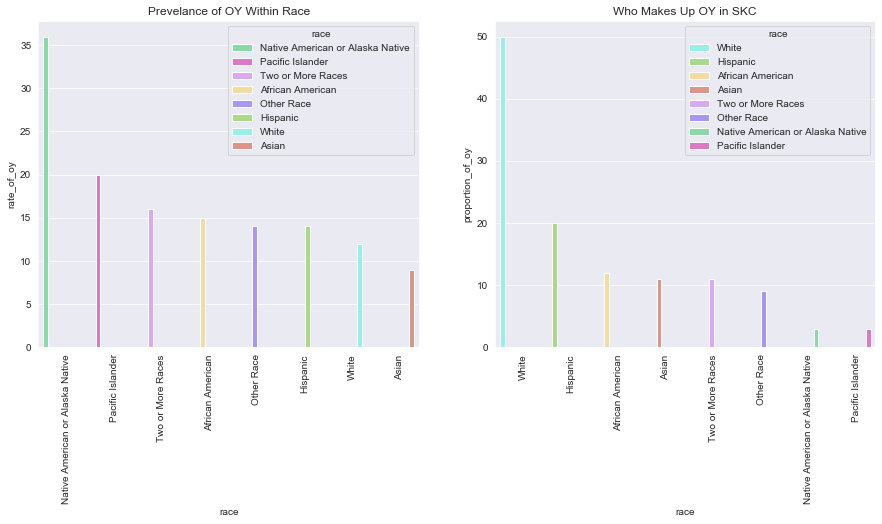

In [37]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
race_palette = {'White':'#87FFF6', 'Hispanic':'#A6E87B', 'African American':'#FFE294', 'Asian':'#E88D7B', 'Two or More Races':'#DD9EFF', 'Other Race':'#A187FF', 'Native American or Alaska Native':'#7BE8A3', 'Pacific Islander':'#EB6ACC'}

sns.barplot(data=racial_df.sort_values('rate_of_oy', ascending=False), x='race', y='rate_of_oy', hue='race', ax=ax[0], palette=race_palette)
ax[0].set_xticklabels(labels=racial_df.sort_values('rate_of_oy', ascending=False)['race'], rotation=90, ha='left')
ax[0].set_title('Prevelance of OY Within Race')
racial_df_sort_prop_oy = racial_df.sort_values('proportion_of_oy', ascending=False)
sns.barplot(data=racial_df_sort_prop_oy, x='race', y='proportion_of_oy', hue='race', ax=ax[1], palette=race_palette)
ax[1].set_xticklabels(labels=racial_df_sort_prop_oy['race'], rotation=90, ha='left')
ax[1].set_title('Who Makes Up OY in SKC')

## OY in 2016 vs. Now

Text(0.5, 1.0, 'Number of OY in SKC 2016 vs. 2020')

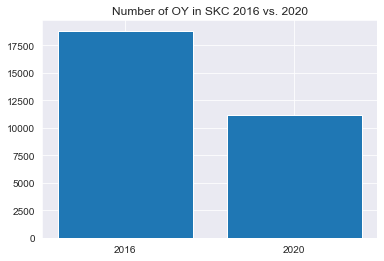

In [38]:
plt.bar(['2016', '2020'], [18817, 11115])
plt.title('Number of OY in SKC 2016 vs. 2020')

In [39]:
!ls

01_erh_download_and_explore_data.ipynb ay_df_22_24.csv
02_samt_exploratory.ipynb              kyle_the_seconding.ipynb
02_samt_v2_exploratory.ipynb           oy_df.csv
Kyle_Exploration.ipynb                 oy_df_16_18.csv
README.md                              oy_df_19_21.csv
age_data.csv                           oy_df_22_24.csv
ay_df.csv                              project_outcomes.ipynb
ay_df_16_18.csv                        racial_data.csv
ay_df_19_21.csv


In [78]:
import sqlite3
cur = sqlite3.connect('opportunity_youth.sqlite').cursor()


In [52]:
cur.execute("""
SELECT name FROM sqlite_master WHERE type='table'
""").fetchall()

[]

In [73]:
pd.read_sql("""
            SELECT puma, fincp, adjinc
            FROM pums_2017
            WHERE puma in ('11610', '11611', '11612', '11613', '11614', '11615')
            LIMIT 10
            """, conn)

DatabaseError: Execution failed on sql '
            SELECT puma, fincp, adjinc
            FROM pums_2017
            WHERE puma in ('11610', '11611', '11612', '11613', '11614', '11615')
            LIMIT 10
            ': column "fincp" does not exist
LINE 2:             SELECT puma, fincp, adjinc
                                 ^


In [ ]:
# conn.close()